# Introduction to modeling: from concept to mathematics



## From concept to ordinary differential equation (ODE) using mass balance: example of a lake basin

Imagine we have a lake or reservoir, and would like to understand better the factors that control how its water volume grows or shrinks over time. In particular, it we would like to have a mathematical model that predicts how the volume changes over time as a function of the various inputs and outputs. We can create such a model using a general and powerful technique called **mass balance analysis**.

### Defining a control volume

We start by defining the substance whose mass we want to track (say, water), and a *control volume:* a zone in space in which we want to keep track of mass. It could have a specific shape and size, such as water within an aquifer that has certain dimensions. Or it could be a conceptual "box", such as the organic carbon in the world's soils. Either way, our control volume defines the boundaries of our system, and our model's job will be to describe the ins and outs of mass across those boundaries.

In this example, our control volume will be a lake basin in the shape of an inverted pyramid:



The height of water in the lake (above its deepest point) is $H$. The length and width of the lake are $L$ and $W$, respectively. The volume of water in the lake at any given time is $V$.


### General statement of mass balance

We start with a general statement of mass balance, first in words:

**The time rate of change of mass in the control volume equals the rate of mass input, minus the rate of mass output, plus or minus any internal sources or sinks**

Written in math:

$$
\begin{equation}
\frac{dm}{dt} = M_\text{in} - M_\text{out} + S
\end{equation}
$$

where:

$m$ is mass [M]

$t$ is time [T]

$M_\text{in}$ [M/T] is the rate of mass flowing into the control volume across its boundaries

$M_\text{out}$ [M/T] is the rate of mass flowing out of the control volume across its boundaries

$S$ [M/T] is the rate at which mass (of the substance of interest) is created or lost inside the volume

(Here the notation [M], [T], [L] is used to indicate quantities that have units of mass, time, or length, respectively).



### List assumptions

For our lake model, we will (initially) assume:

- Density of water is constant ($\rho$)
- Water enters lake from a river with discharge (volume per time) $Q_\text{in}$
- Water leaves the lake via evaporation at rate $E$
- No internal sources or sinks (i.e., $S=0$)


### Express the pieces in the general mass-balance equation in terms of quantities of interest

#### Mass of water in lake at any given time

$$m = \rho V$$

$$M_\text{in} = \rho Q$$

$$M_\text{out} = \rho E L W$$

$$S=0$$


### Plug them into the balance equation, and rearrange to get the quantity of interest on the left side of the equation

$$\frac{d(\rho V)}{dt} = \rho Q - \rho E L W$$

Because $\rho$ is constant,

$$\frac{dV}{dt} = Q - E L W$$

Width ($W$) and volume ($V$) are related by geometry:

$$W = \sqrt{\frac{2V}{L\tan\alpha}}$$

So we have a **nonlinear ordinary differential equation (ODE)**:

$$\boxed{\frac{dV}{dt} = Q - E \sqrt{\frac{2VL}{\tan\alpha}}}$$





### Solve your model

#### Analytical solutions

Sometimes we are lucky, and our mathematical model can be solved analytically. Often, we can at least solve it for special cases. 

Here for example, there's an obvious solution for what the lake looks like at steady state, inflow and evaporation are balanced and the time derivative is zero:

$$V = \frac{\tan\alpha}{2L} \left( \frac{Q}{E} \right)^2$$

##### Exercise: plotting steady state $V$

In the cell below, import NumPy and matplotlib.pyplot, and use them in a Python script to plot volume versus evaporation rate for a hypothetical lake that has $\tan\alpha = 0.01$, $L = 2,000$ m, $Q = 10^7$ cubic meters per year, and $E$ ranging from 1 to 6 meters per year.

Text(0, 0.5, 'Steady lake volume (m3)')

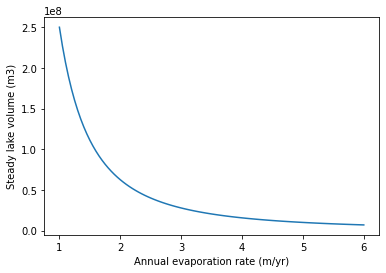

In [1]:
# Enter your code here
import numpy as np
import matplotlib.pyplot as plt

tana = 0.01
L = 2000.0
Q = 1.0e7
E = np.linspace(1.0, 6.0, 101)

V = (tana / (2 * L)) * (Q / E)**2

plt.plot(E, V)
plt.xlabel('Annual evaporation rate (m/yr)')
plt.ylabel('Steady lake volume (m3)')

#### Numerical solution

Often a mathematical model will have no (known or easy) analytical solution, so we need to calculate an approximate **numerical solution**. One of the most common numerical approaches is the **finite-difference** method, in which we replace derivatives with finite approximations.

Taylor's Theorem tells us that if the value of a continuous and differential function is known at a point $t$, then its value at an unknown point $t + \Delta t$ can be found as the sum of an infinite series:

$$f(t+\Delta t) = f(t) + \frac{df}{dt}\Delta t + \frac{1}{2} \frac{d^2f}{dt^2}\Delta t^2 + + \frac{1}{3!} \frac{d^3f}{dt^3}\Delta t^3 + ...$$

We can *approximate* $f(t+\Delta t)$ by truncating this. If we truncate it to "first order" (i.e., keep only the first derivative), then

$$\frac{df}{dt} \approx \frac{f(t+\Delta t) - f(t)}{\Delta t}$$